# Kaggle competition
## Predict forest cover type based on cartographic variables

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
os.chdir(r'C:\Users\Helio\Documents\ALL THAT MATTERS\git\Machine_Learning_FGV\05- Tensorflow Classification with Neural Networks')

In [4]:
import pandas as pd

In [13]:
data = pd.read_csv('train.csv')

In [6]:
data.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [19]:
data.shape

(15120, 56)

In [9]:
data.isnull().sum().sum()
#no null values

0

In [15]:
y = data['Cover_Type'].values
X = data.drop(['Cover_Type','Id'], axis=1)
covariates = list(data.drop(['Cover_Type','Id'], axis=1))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
y_train = np.float32(y_train)
y_test = np.float32(y_test)

## Classification

In [219]:
# Load libraries
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.layers import Dropout

# Set random seed
np.random.seed(0)

In [145]:
# Set the number of features we want
number_of_features = 54

In [163]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Ytrain = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_1hot = np_utils.to_categorical(encoded_Ytrain)

In [165]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Ytest = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_1hot = np_utils.to_categorical(encoded_Ytest)

In [166]:
y_train_1hot.shape

(12096, 7)

In [167]:
y_test_1hot.shape

(3024, 7)

In [190]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=54))
#model.add(Dropout(0.25))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std,y_train_1hot, epochs=50, batch_size=10)

Epoch 1/50
12096/12096 [==============================] - 2s 187us/step - loss: 1.0590 - acc: 0.5790
Epoch 2/50
12096/12096 [==============================] - 2s 145us/step - loss: 0.7364 - acc: 0.6981
Epoch 3/50
12096/12096 [==============================] - 2s 139us/step - loss: 0.6721 - acc: 0.7179
Epoch 4/50
12096/12096 [==============================] - 2s 142us/step - loss: 0.6357 - acc: 0.7292
Epoch 5/50
12096/12096 [==============================] - 2s 143us/step - loss: 0.6054 - acc: 0.7458
Epoch 6/50
12096/12096 [==============================] - 2s 140us/step - loss: 0.5844 - acc: 0.7557
Epoch 7/50
12096/12096 [==============================] - 2s 140us/step - loss: 0.5685 - acc: 0.7601
Epoch 8/50
12096/12096 [==============================] - 2s 144us/step - loss: 0.5543 - acc: 0.7669
Epoch 9/50
12096/12096 [==============================] - 2s 140us/step - loss: 0.5451 - acc: 0.7670
Epoch 10/50
12096/12096 [==============================] - 2s 141us/step - loss: 0.5324 - a

In [191]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


Text(0,0.5,'Accuracy')

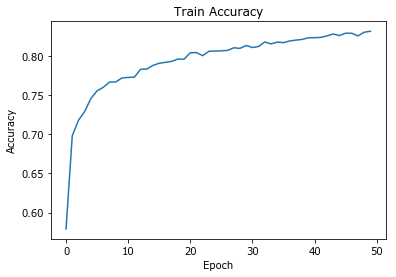

In [194]:
plt.plot(history.history['acc'])
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0,0.5,'Loss')

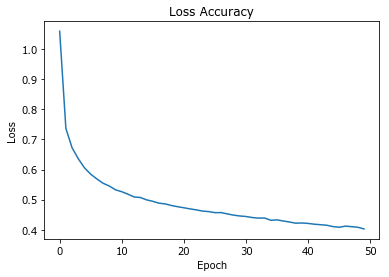

In [195]:
plt.plot(history.history['loss'])
plt.title('Loss Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [223]:
X_std = np.concatenate([X_train_std,X_test_std], axis=0)
y_1hot = np.concatenate([y_train_1hot, y_test_1hot], axis=0)

In [201]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=54))
#model.add(Dropout(0.25))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std,y_train_1hot, validation_split=0.2, epochs=100, batch_size=10)

Train on 9676 samples, validate on 2420 samples
Epoch 1/100
9676/9676 [==============================] - 4s 424us/step - loss: 1.1258 - acc: 0.5521 - val_loss: 0.8195 - val_acc: 0.6438
Epoch 2/100
9676/9676 [==============================] - 2s 155us/step - loss: 0.7459 - acc: 0.6845 - val_loss: 0.7070 - val_acc: 0.7017
Epoch 3/100
9676/9676 [==============================] - 2s 162us/step - loss: 0.6701 - acc: 0.7210 - val_loss: 0.6854 - val_acc: 0.7058
Epoch 4/100
9676/9676 [==============================] - 2s 159us/step - loss: 0.6355 - acc: 0.7341 - val_loss: 0.6328 - val_acc: 0.7318
Epoch 5/100
9676/9676 [==============================] - 2s 176us/step - loss: 0.6121 - acc: 0.7409 - val_loss: 0.6181 - val_acc: 0.7347
Epoch 6/100
9676/9676 [==============================] - 2s 188us/step - loss: 0.5928 - acc: 0.7458 - val_loss: 0.6251 - val_acc: 0.7256
Epoch 7/100
9676/9676 [==============================] - 2s 186us/step - loss: 0.5815 - acc: 0.7527 - val_loss: 0.6117 - val_acc: 

9676/9676 [==============================] - 2s 177us/step - loss: 0.4081 - acc: 0.8343 - val_loss: 0.5600 - val_acc: 0.7806
Epoch 61/100
9676/9676 [==============================] - 2s 183us/step - loss: 0.4067 - acc: 0.8328 - val_loss: 0.5616 - val_acc: 0.7760
Epoch 62/100
9676/9676 [==============================] - 2s 169us/step - loss: 0.4081 - acc: 0.8343 - val_loss: 0.5597 - val_acc: 0.7831
Epoch 63/100
9676/9676 [==============================] - 2s 174us/step - loss: 0.4084 - acc: 0.8342 - val_loss: 0.5602 - val_acc: 0.7818
Epoch 64/100
9676/9676 [==============================] - 2s 175us/step - loss: 0.4074 - acc: 0.8366 - val_loss: 0.5538 - val_acc: 0.7810
Epoch 65/100
9676/9676 [==============================] - 2s 157us/step - loss: 0.4056 - acc: 0.8339 - val_loss: 0.5685 - val_acc: 0.7769
Epoch 66/100
9676/9676 [==============================] - 1s 154us/step - loss: 0.4048 - acc: 0.8369 - val_loss: 0.5561 - val_acc: 0.7860
Epoch 67/100
9676/9676 [=======================

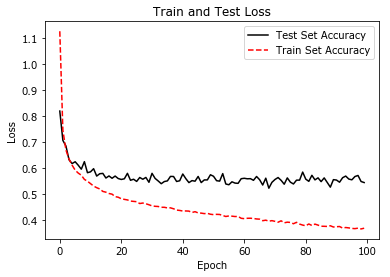

In [208]:
plt.plot(history.history['val_loss'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['loss'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

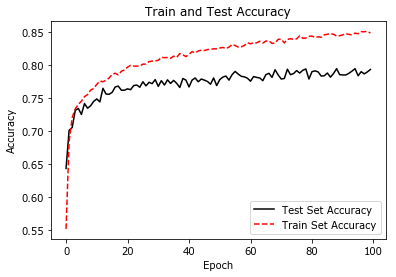

In [209]:
plt.plot(history.history['val_acc'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['acc'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Change optimizer and add dropout

Obs: dropout, in this case, makes validation accuracy greater than test accuracy

In [234]:
optims = ['sgd','adam','rmsprop','adadelta','adamax','nadam']

In [225]:
lista = []

In [235]:
for optim in optims:
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=54))
    model.add(Dropout(0.25))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer=optim,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_std, y_1hot, validation_split=0.2, epochs=100, batch_size=10)
    
    print('ok')
    
    lista.append(history.history['loss'])
    lista.append(history.history['val_loss'])
    lista.append(history.history['acc'])
    lista.append(history.history['val_acc'])

Train on 12096 samples, validate on 3024 samples
Epoch 1/100
12096/12096 [==============================] - 4s 349us/step - loss: 1.6063 - acc: 0.3331 - val_loss: 1.1280 - val_acc: 0.5450
Epoch 2/100
12096/12096 [==============================] - 3s 228us/step - loss: 1.2492 - acc: 0.4597 - val_loss: 0.9889 - val_acc: 0.6101
Epoch 3/100
12096/12096 [==============================] - 2s 203us/step - loss: 1.1452 - acc: 0.5056 - val_loss: 0.9299 - val_acc: 0.6164
Epoch 4/100
12096/12096 [==============================] - 2s 205us/step - loss: 1.0809 - acc: 0.5460 - val_loss: 0.8848 - val_acc: 0.6290
Epoch 5/100
12096/12096 [==============================] - 3s 224us/step - loss: 1.0503 - acc: 0.5557 - val_loss: 0.8595 - val_acc: 0.6369
Epoch 6/100
12096/12096 [==============================] - 3s 242us/step - loss: 1.0021 - acc: 0.5715 - val_loss: 0.8371 - val_acc: 0.6326
Epoch 7/100
12096/12096 [==============================] - 3s 223us/step - loss: 0.9861 - acc: 0.5780 - val_loss: 0.8

12096/12096 [==============================] - 3s 223us/step - loss: 0.8448 - acc: 0.6674 - val_loss: 0.7083 - val_acc: 0.7229
Epoch 60/100
12096/12096 [==============================] - 2s 201us/step - loss: 0.8317 - acc: 0.6739 - val_loss: 0.7089 - val_acc: 0.7245
Epoch 61/100
12096/12096 [==============================] - 3s 228us/step - loss: 0.8456 - acc: 0.6668 - val_loss: 0.7143 - val_acc: 0.7252
Epoch 62/100
12096/12096 [==============================] - 2s 191us/step - loss: 0.8297 - acc: 0.6726 - val_loss: 0.7087 - val_acc: 0.7269
Epoch 63/100
12096/12096 [==============================] - 2s 194us/step - loss: 0.8303 - acc: 0.6739 - val_loss: 0.7024 - val_acc: 0.7298
Epoch 64/100
12096/12096 [==============================] - 2s 193us/step - loss: 0.8386 - acc: 0.6727 - val_loss: 0.7053 - val_acc: 0.7212
Epoch 65/100
12096/12096 [==============================] - 2s 189us/step - loss: 0.8314 - acc: 0.6834 - val_loss: 0.7091 - val_acc: 0.7179
Epoch 66/100
12096/12096 [=======

12096/12096 [==============================] - 3s 208us/step - loss: 0.8672 - acc: 0.6391 - val_loss: 0.7352 - val_acc: 0.7007
Epoch 18/100
12096/12096 [==============================] - 3s 225us/step - loss: 0.8647 - acc: 0.6390 - val_loss: 0.7304 - val_acc: 0.6941
Epoch 19/100
12096/12096 [==============================] - 2s 196us/step - loss: 0.8672 - acc: 0.6391 - val_loss: 0.7379 - val_acc: 0.6954
Epoch 20/100
12096/12096 [==============================] - 2s 196us/step - loss: 0.8537 - acc: 0.6454 - val_loss: 0.7214 - val_acc: 0.6987
Epoch 21/100
12096/12096 [==============================] - 3s 217us/step - loss: 0.8422 - acc: 0.6452 - val_loss: 0.7193 - val_acc: 0.7067
Epoch 22/100
12096/12096 [==============================] - 3s 207us/step - loss: 0.8401 - acc: 0.6493 - val_loss: 0.7135 - val_acc: 0.7126
Epoch 23/100
12096/12096 [==============================] - 2s 203us/step - loss: 0.8367 - acc: 0.6553 - val_loss: 0.7136 - val_acc: 0.7097
Epoch 24/100
12096/12096 [=======

12096/12096 [==============================] - 2s 197us/step - loss: 0.7501 - acc: 0.6962 - val_loss: 0.6606 - val_acc: 0.7305
Epoch 76/100
12096/12096 [==============================] - 2s 195us/step - loss: 0.7564 - acc: 0.6942 - val_loss: 0.6548 - val_acc: 0.7341
Epoch 77/100
12096/12096 [==============================] - 3s 210us/step - loss: 0.7531 - acc: 0.6949 - val_loss: 0.6535 - val_acc: 0.7341
Epoch 78/100
12096/12096 [==============================] - 3s 230us/step - loss: 0.7477 - acc: 0.6982 - val_loss: 0.6635 - val_acc: 0.7282
Epoch 79/100
12096/12096 [==============================] - 3s 218us/step - loss: 0.7429 - acc: 0.6995 - val_loss: 0.6532 - val_acc: 0.7345
Epoch 80/100
12096/12096 [==============================] - 3s 212us/step - loss: 0.7500 - acc: 0.6963 - val_loss: 0.6580 - val_acc: 0.7371
Epoch 81/100
12096/12096 [==============================] - 2s 204us/step - loss: 0.7386 - acc: 0.6993 - val_loss: 0.6535 - val_acc: 0.7351
Epoch 82/100
12096/12096 [=======

12096/12096 [==============================] - 2s 199us/step - loss: 0.7711 - acc: 0.6747 - val_loss: 0.6367 - val_acc: 0.7295
Epoch 34/100
12096/12096 [==============================] - 2s 197us/step - loss: 0.7683 - acc: 0.6787 - val_loss: 0.6453 - val_acc: 0.7222
Epoch 35/100
12096/12096 [==============================] - 2s 198us/step - loss: 0.7648 - acc: 0.6790 - val_loss: 0.6355 - val_acc: 0.7388
Epoch 36/100
12096/12096 [==============================] - 2s 200us/step - loss: 0.7531 - acc: 0.6809 - val_loss: 0.6446 - val_acc: 0.7269
Epoch 37/100
12096/12096 [==============================] - 2s 194us/step - loss: 0.7574 - acc: 0.6795 - val_loss: 0.6466 - val_acc: 0.7226
Epoch 38/100
12096/12096 [==============================] - 2s 199us/step - loss: 0.7541 - acc: 0.6895 - val_loss: 0.6354 - val_acc: 0.7318
Epoch 39/100
12096/12096 [==============================] - 3s 224us/step - loss: 0.7565 - acc: 0.6797 - val_loss: 0.6406 - val_acc: 0.7421
Epoch 40/100
12096/12096 [=======

12096/12096 [==============================] - 3s 222us/step - loss: 0.7410 - acc: 0.6911 - val_loss: 0.6160 - val_acc: 0.7431
Epoch 92/100
12096/12096 [==============================] - 3s 245us/step - loss: 0.7407 - acc: 0.6950 - val_loss: 0.6187 - val_acc: 0.7487
Epoch 93/100
12096/12096 [==============================] - 3s 223us/step - loss: 0.7310 - acc: 0.6974 - val_loss: 0.6143 - val_acc: 0.7474
Epoch 94/100
12096/12096 [==============================] - 3s 214us/step - loss: 0.7283 - acc: 0.6974 - val_loss: 0.6202 - val_acc: 0.7374
Epoch 95/100
12096/12096 [==============================] - 3s 212us/step - loss: 0.7266 - acc: 0.6963 - val_loss: 0.6070 - val_acc: 0.7589
Epoch 96/100
12096/12096 [==============================] - 3s 236us/step - loss: 0.7354 - acc: 0.6941 - val_loss: 0.6328 - val_acc: 0.7345
Epoch 97/100
12096/12096 [==============================] - 3s 277us/step - loss: 0.7291 - acc: 0.7002 - val_loss: 0.6258 - val_acc: 0.7348
Epoch 98/100
12096/12096 [=======

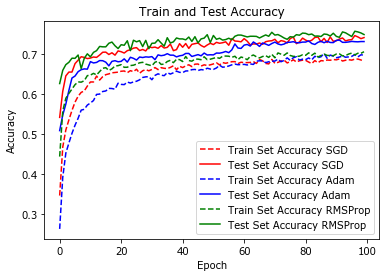

In [233]:
plt.plot(lista[2], 'r--', label='Train Set Accuracy SGD')
plt.plot(lista[3], 'r-', label='Test Set Accuracy SGD')

plt.plot(lista[6], 'b--', label='Train Set Accuracy Adam')
plt.plot(lista[7], 'b-', label='Test Set Accuracy Adam')

plt.plot(lista[10], 'g--', label='Train Set Accuracy RMSProp')
plt.plot(lista[11], 'g-', label='Test Set Accuracy RMSProp')

plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

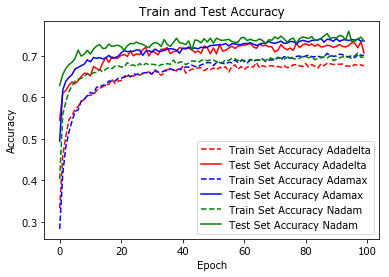

In [236]:
plt.plot(lista[14], 'r--', label='Train Set Accuracy Adadelta')
plt.plot(lista[15], 'r-', label='Test Set Accuracy Adadelta')

plt.plot(lista[18], 'b--', label='Train Set Accuracy Adamax')
plt.plot(lista[19], 'b-', label='Test Set Accuracy Adamax')

plt.plot(lista[22], 'g--', label='Train Set Accuracy Nadam')
plt.plot(lista[23], 'g-', label='Test Set Accuracy Nadam')

plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

(0.5, 0.76)

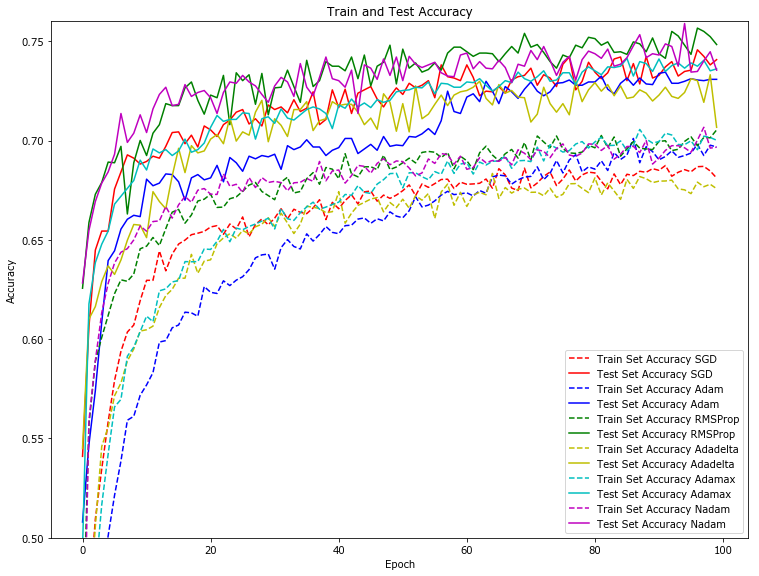

In [262]:
plt.plot(lista[2], 'r--', label='Train Set Accuracy SGD')
plt.plot(lista[3], 'r-', label='Test Set Accuracy SGD')

plt.plot(lista[6], 'b--', label='Train Set Accuracy Adam')
plt.plot(lista[7], 'b-', label='Test Set Accuracy Adam')

plt.plot(lista[10], 'g--', label='Train Set Accuracy RMSProp')
plt.plot(lista[11], 'g-', label='Test Set Accuracy RMSProp')

plt.plot(lista[14], 'y--', label='Train Set Accuracy Adadelta')
plt.plot(lista[15], 'y-', label='Test Set Accuracy Adadelta')

plt.plot(lista[18], 'c--', label='Train Set Accuracy Adamax')
plt.plot(lista[19], 'c-', label='Test Set Accuracy Adamax')

plt.plot(lista[22], 'm--', label='Train Set Accuracy Nadam')
plt.plot(lista[23], 'm-', label='Test Set Accuracy Nadam')

plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
fig = plt.gcf()
fig.set_size_inches(12.5, 9.5)
plt.ylim(0.5, 0.76)

(0.55, 1.2)

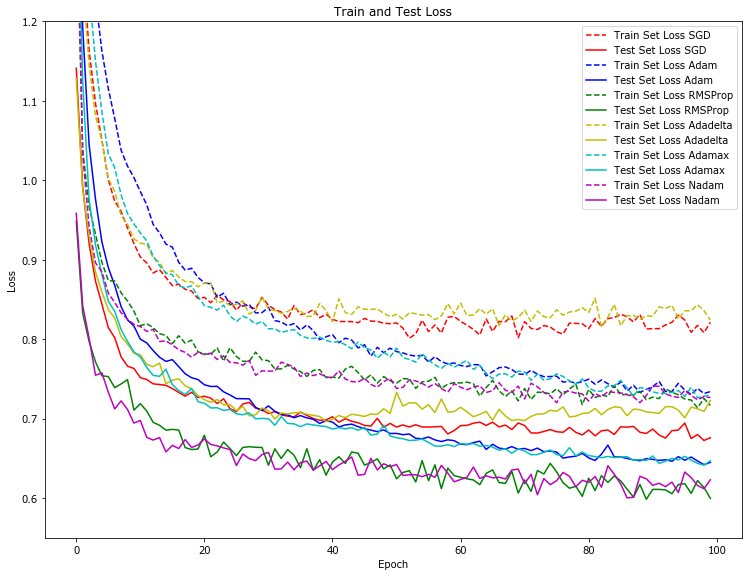

In [264]:
plt.plot(lista[0], 'r--', label='Train Set Loss SGD')
plt.plot(lista[1], 'r-', label='Test Set Loss SGD')

plt.plot(lista[4], 'b--', label='Train Set Loss Adam')
plt.plot(lista[5], 'b-', label='Test Set Loss Adam')

plt.plot(lista[8], 'g--', label='Train Set Loss RMSProp')
plt.plot(lista[9], 'g-', label='Test Set Loss RMSProp')

plt.plot(lista[12], 'y--', label='Train Set Loss Adadelta')
plt.plot(lista[13], 'y-', label='Test Set Loss Adadelta')

plt.plot(lista[16], 'c--', label='Train Set Loss Adamax')
plt.plot(lista[17], 'c-', label='Test Set Loss Adamax')

plt.plot(lista[20], 'm--', label='Train Set Loss Nadam')
plt.plot(lista[21], 'm-', label='Test Set Loss Nadam')

plt.title('Train and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(12.5, 9.5)
plt.ylim(0.55, 1.2)

Dropout in the first layers might prevent the network to learn importante initial features. Then, the validation accuracy should improve withou dropout in the first layers. Indeed, the accuracy increased but dropout decreases accuracy yet. Maybe there's too few layers for a dropout to have positive impact on accuracies.

In [273]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=54))
#model.add(Dropout(0.25))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=50, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/50
12096/12096 [==============================] - 4s 306us/step - loss: 1.3204 - acc: 0.4497 - val_loss: 0.9030 - val_acc: 0.6372
Epoch 2/50
12096/12096 [==============================] - 3s 253us/step - loss: 0.9735 - acc: 0.5865 - val_loss: 0.8085 - val_acc: 0.6558
Epoch 3/50
12096/12096 [==============================] - 3s 264us/step - loss: 0.8945 - acc: 0.6226 - val_loss: 0.7572 - val_acc: 0.6921
Epoch 4/50
12096/12096 [==============================] - 3s 231us/step - loss: 0.8596 - acc: 0.6472 - val_loss: 0.7404 - val_acc: 0.6954
Epoch 5/50
12096/12096 [==============================] - 3s 210us/step - loss: 0.8261 - acc: 0.6615 - val_loss: 0.7213 - val_acc: 0.7037
Epoch 6/50
12096/12096 [==============================] - 3s 251us/step - loss: 0.7976 - acc: 0.6728 - val_loss: 0.7064 - val_acc: 0.7146
Epoch 7/50
12096/12096 [==============================] - 3s 281us/step - loss: 0.7942 - acc: 0.6779 - val_loss: 0.7036 - v

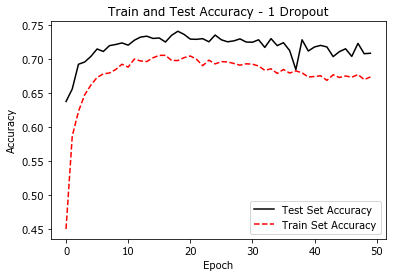

In [274]:
plt.plot(history.history['val_acc'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['acc'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Accuracy - 1 Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [272]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=54))
#model.add(Dropout(0.25))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std,y_train_1hot, validation_split=0.2, epochs=50, batch_size=10)

Train on 9676 samples, validate on 2420 samples
Epoch 1/50
9676/9676 [==============================] - 3s 345us/step - loss: 1.3154 - acc: 0.4555 - val_loss: 0.9253 - val_acc: 0.6260
Epoch 2/50
9676/9676 [==============================] - 2s 219us/step - loss: 0.9603 - acc: 0.5951 - val_loss: 0.8053 - val_acc: 0.6562
Epoch 3/50
9676/9676 [==============================] - 2s 244us/step - loss: 0.8852 - acc: 0.6238 - val_loss: 0.7522 - val_acc: 0.6773
Epoch 4/50
9676/9676 [==============================] - 2s 223us/step - loss: 0.8402 - acc: 0.6450 - val_loss: 0.7258 - val_acc: 0.6901
Epoch 5/50
9676/9676 [==============================] - 2s 255us/step - loss: 0.8117 - acc: 0.6542 - val_loss: 0.7046 - val_acc: 0.7033
Epoch 6/50
9676/9676 [==============================] - 2s 231us/step - loss: 0.7887 - acc: 0.6698 - val_loss: 0.6897 - val_acc: 0.7107
Epoch 7/50
9676/9676 [==============================] - 2s 224us/step - loss: 0.7631 - acc: 0.6819 - val_loss: 0.6703 - val_acc: 0.7256


Let's try then to add more layers to check if dropout turns out to be of any help.

In [279]:
model = Sequential()
model.add(Dense(40, activation='relu', input_dim=54))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=50, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/50
12096/12096 [==============================] - 5s 430us/step - loss: 0.9895 - acc: 0.6024 - val_loss: 0.7624 - val_acc: 0.6746
Epoch 2/50
12096/12096 [==============================] - 3s 239us/step - loss: 0.6993 - acc: 0.7040 - val_loss: 0.7170 - val_acc: 0.7063
Epoch 3/50
12096/12096 [==============================] - 3s 245us/step - loss: 0.6401 - acc: 0.7288 - val_loss: 0.6486 - val_acc: 0.7282
Epoch 4/50
12096/12096 [==============================] - 3s 253us/step - loss: 0.6069 - acc: 0.7417 - val_loss: 0.6285 - val_acc: 0.7305
Epoch 5/50
12096/12096 [==============================] - 3s 285us/step - loss: 0.5834 - acc: 0.7517 - val_loss: 0.6459 - val_acc: 0.7351
Epoch 6/50
12096/12096 [==============================] - 3s 264us/step - loss: 0.5651 - acc: 0.7607 - val_loss: 0.6091 - val_acc: 0.7474
Epoch 7/50
12096/12096 [==============================] - 3s 258us/step - loss: 0.5461 - acc: 0.7651 - val_loss: 0.5783 - v

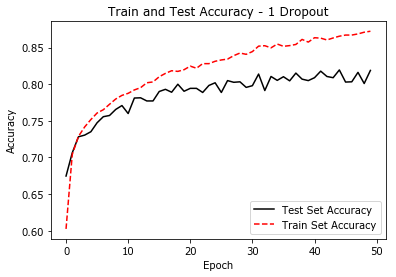

In [280]:
plt.plot(history.history['val_acc'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['acc'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Accuracy - 1 Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Overfit is clear in this case. Let's try dropout this time.

In [281]:
model = Sequential()
model.add(Dense(40, activation='relu', input_dim=54))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=50, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/50
12096/12096 [==============================] - 5s 419us/step - loss: 1.1412 - acc: 0.5408 - val_loss: 0.8453 - val_acc: 0.6528
Epoch 2/50
12096/12096 [==============================] - 4s 332us/step - loss: 0.8629 - acc: 0.6404 - val_loss: 0.7341 - val_acc: 0.6878
Epoch 3/50
12096/12096 [==============================] - 4s 322us/step - loss: 0.7734 - acc: 0.6792 - val_loss: 0.6942 - val_acc: 0.7073
Epoch 4/50
12096/12096 [==============================] - 3s 275us/step - loss: 0.7278 - acc: 0.6983 - val_loss: 0.6630 - val_acc: 0.7196
Epoch 5/50
12096/12096 [==============================] - 3s 245us/step - loss: 0.6937 - acc: 0.7135 - val_loss: 0.6428 - val_acc: 0.7292
Epoch 6/50
12096/12096 [==============================] - 3s 256us/step - loss: 0.6666 - acc: 0.7207 - val_loss: 0.6155 - val_acc: 0.7364
Epoch 7/50
12096/12096 [==============================] - 3s 242us/step - loss: 0.6490 - acc: 0.7292 - val_loss: 0.6195 - v

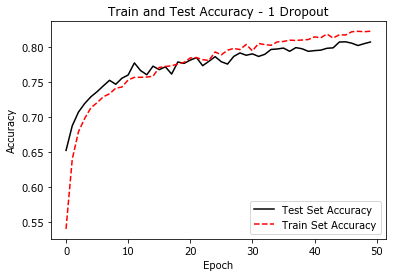

In [282]:
plt.plot(history.history['val_acc'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['acc'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Accuracy - 1 Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Accuracy is nearly the same and it is now very close to the training set accuracy. It looks like the accuracy path is still growing for 50 epochs. Let's try 75!

In [283]:
model = Sequential()
model.add(Dense(40, activation='relu', input_dim=54))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=75, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/75
12096/12096 [==============================] - 5s 402us/step - loss: 1.1430 - acc: 0.5499 - val_loss: 0.8013 - val_acc: 0.6743
Epoch 2/75
12096/12096 [==============================] - 3s 261us/step - loss: 0.8389 - acc: 0.6577 - val_loss: 0.7357 - val_acc: 0.6987
Epoch 3/75
12096/12096 [==============================] - 4s 303us/step - loss: 0.7667 - acc: 0.6825 - val_loss: 0.6959 - val_acc: 0.7070
Epoch 4/75
12096/12096 [==============================] - 4s 328us/step - loss: 0.7204 - acc: 0.7011 - val_loss: 0.6740 - val_acc: 0.7087
Epoch 5/75
12096/12096 [==============================] - 3s 283us/step - loss: 0.6940 - acc: 0.7167 - val_loss: 0.6514 - val_acc: 0.7302
Epoch 6/75
12096/12096 [==============================] - 4s 311us/step - loss: 0.6787 - acc: 0.7207 - val_loss: 0.6469 - val_acc: 0.7298
Epoch 7/75
12096/12096 [==============================] - 3s 260us/step - loss: 0.6506 - acc: 0.7324 - val_loss: 0.6047 - v

12096/12096 [==============================] - 3s 281us/step - loss: 0.4092 - acc: 0.8399 - val_loss: 0.5303 - val_acc: 0.8036
Epoch 60/75
12096/12096 [==============================] - 3s 258us/step - loss: 0.4022 - acc: 0.8426 - val_loss: 0.5232 - val_acc: 0.8198
Epoch 61/75
12096/12096 [==============================] - 3s 259us/step - loss: 0.4110 - acc: 0.8379 - val_loss: 0.5033 - val_acc: 0.8125
Epoch 62/75
12096/12096 [==============================] - 3s 260us/step - loss: 0.3997 - acc: 0.8438 - val_loss: 0.5393 - val_acc: 0.8135
Epoch 63/75
12096/12096 [==============================] - 4s 296us/step - loss: 0.4015 - acc: 0.8441 - val_loss: 0.5187 - val_acc: 0.8145
Epoch 64/75
12096/12096 [==============================] - 3s 248us/step - loss: 0.3973 - acc: 0.8437 - val_loss: 0.5101 - val_acc: 0.8099
Epoch 65/75
12096/12096 [==============================] - 3s 267us/step - loss: 0.3968 - acc: 0.8475 - val_loss: 0.5436 - val_acc: 0.8151
Epoch 66/75
12096/12096 [==============

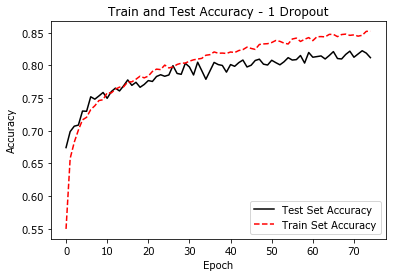

In [284]:
plt.plot(history.history['val_acc'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['acc'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Accuracy - 1 Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [287]:
model = Sequential()
model.add(Dense(40, activation='relu', input_dim=54))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=100, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/100
12096/12096 [==============================] - 6s 482us/step - loss: 1.2381 - acc: 0.4831 - val_loss: 0.8396 - val_acc: 0.6534
Epoch 2/100
12096/12096 [==============================] - 3s 276us/step - loss: 0.8733 - acc: 0.6315 - val_loss: 0.7328 - val_acc: 0.6806
Epoch 3/100
12096/12096 [==============================] - 3s 287us/step - loss: 0.7862 - acc: 0.6663 - val_loss: 0.7047 - val_acc: 0.6978
Epoch 4/100
12096/12096 [==============================] - 3s 273us/step - loss: 0.7475 - acc: 0.6855 - val_loss: 0.6642 - val_acc: 0.7202
Epoch 5/100
12096/12096 [==============================] - 3s 269us/step - loss: 0.7037 - acc: 0.6998 - val_loss: 0.6825 - val_acc: 0.7097
Epoch 6/100
12096/12096 [==============================] - 4s 296us/step - loss: 0.6850 - acc: 0.7188 - val_loss: 0.6408 - val_acc: 0.7351
Epoch 7/100
12096/12096 [==============================] - 3s 263us/step - loss: 0.6709 - acc: 0.7149 - val_loss: 0.6

12096/12096 [==============================] - 3s 260us/step - loss: 0.4460 - acc: 0.8203 - val_loss: 0.5447 - val_acc: 0.7983
Epoch 60/100
12096/12096 [==============================] - 3s 278us/step - loss: 0.4423 - acc: 0.8241 - val_loss: 0.5573 - val_acc: 0.7993
Epoch 61/100
12096/12096 [==============================] - 4s 299us/step - loss: 0.4421 - acc: 0.8225 - val_loss: 0.5330 - val_acc: 0.8026
Epoch 62/100
12096/12096 [==============================] - 4s 290us/step - loss: 0.4419 - acc: 0.8198 - val_loss: 0.5179 - val_acc: 0.8115
Epoch 63/100
12096/12096 [==============================] - 3s 272us/step - loss: 0.4418 - acc: 0.8259 - val_loss: 0.5338 - val_acc: 0.7989
Epoch 64/100
12096/12096 [==============================] - 3s 277us/step - loss: 0.4357 - acc: 0.8271 - val_loss: 0.5335 - val_acc: 0.8052
Epoch 65/100
12096/12096 [==============================] - 3s 283us/step - loss: 0.4389 - acc: 0.8240 - val_loss: 0.5402 - val_acc: 0.8062
Epoch 66/100
12096/12096 [=======

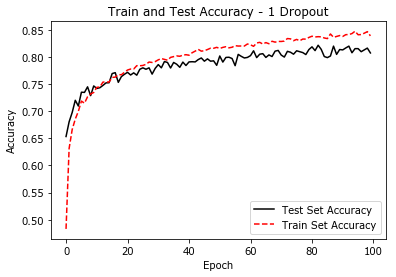

In [288]:
plt.plot(history.history['val_acc'], 'k-', label='Test Set Accuracy')
plt.plot(history.history['acc'], 'r--', label='Train Set Accuracy')
plt.title('Train and Test Accuracy - 1 Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Change Loss Function

Due to the great amount of loss functions, we'll only train 40 epochs for each one of them. It might be visible after the training step if any of them has still increasing returns.

In [299]:
losses=['mean_squared_error','categorical_crossentropy','mean_absolute_error','mean_squared_logarithmic_error',
       'squared_hinge','logcosh','kullback_leibler_divergence','poisson','cosine_proximity']
lista2 = []

for loss in losses:
    model = Sequential()
    model.add(Dense(40, activation='relu', input_dim=54))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])

    history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=40, batch_size=10)
    
    lista2.append(history.history['loss'])
    lista2.append(history.history['val_loss'])
    lista2.append(history.history['acc'])
    lista2.append(history.history['val_acc'])


Train on 12096 samples, validate on 3024 samples
Epoch 1/40
12096/12096 [==============================] - 6s 524us/step - loss: 0.0876 - acc: 0.5124 - val_loss: 0.0689 - val_acc: 0.6343
Epoch 2/40
12096/12096 [==============================] - 4s 332us/step - loss: 0.0692 - acc: 0.6405 - val_loss: 0.0626 - val_acc: 0.6733
Epoch 3/40
12096/12096 [==============================] - 4s 316us/step - loss: 0.0636 - acc: 0.6836 - val_loss: 0.0578 - val_acc: 0.7050c: 
Epoch 4/40
12096/12096 [==============================] - 4s 310us/step - loss: 0.0597 - acc: 0.6991 - val_loss: 0.0563 - val_acc: 0.7143
Epoch 5/40
12096/12096 [==============================] - 4s 359us/step - loss: 0.0572 - acc: 0.7167 - val_loss: 0.0555 - val_acc: 0.7153
Epoch 6/40
12096/12096 [==============================] - 4s 337us/step - loss: 0.0557 - acc: 0.7269 - val_loss: 0.0535 - val_acc: 0.7368
Epoch 7/40
12096/12096 [==============================] - 4s 316us/step - loss: 0.0544 - acc: 0.7330 - val_loss: 0.0526 

12096/12096 [==============================] - 4s 310us/step - loss: 0.5508 - acc: 0.7733 - val_loss: 0.5551 - val_acc: 0.7669
Epoch 20/40
12096/12096 [==============================] - 4s 312us/step - loss: 0.5509 - acc: 0.7790 - val_loss: 0.5524 - val_acc: 0.7722
Epoch 21/40
12096/12096 [==============================] - 4s 320us/step - loss: 0.5426 - acc: 0.7766 - val_loss: 0.5468 - val_acc: 0.7784
Epoch 22/40
12096/12096 [==============================] - 4s 334us/step - loss: 0.5418 - acc: 0.7817 - val_loss: 0.5520 - val_acc: 0.7758
Epoch 23/40
12096/12096 [==============================] - 5s 373us/step - loss: 0.5415 - acc: 0.7774 - val_loss: 0.5477 - val_acc: 0.7788
Epoch 24/40
12096/12096 [==============================] - 5s 381us/step - loss: 0.5345 - acc: 0.7794 - val_loss: 0.5451 - val_acc: 0.7794
Epoch 25/40
12096/12096 [==============================] - 4s 351us/step - loss: 0.5315 - acc: 0.7839 - val_loss: 0.5434 - val_acc: 0.7877
Epoch 26/40
12096/12096 [==============

Epoch 38/40
12096/12096 [==============================] - 4s 335us/step - loss: 0.0788 - acc: 0.7256 - val_loss: 0.0850 - val_acc: 0.7024.72
Epoch 39/40
12096/12096 [==============================] - 4s 354us/step - loss: 0.0794 - acc: 0.7237 - val_loss: 0.0785 - val_acc: 0.7252
Epoch 40/40
12096/12096 [==============================] - 5s 380us/step - loss: 0.0769 - acc: 0.7331 - val_loss: 0.0810 - val_acc: 0.7163
Train on 12096 samples, validate on 3024 samples
Epoch 1/40
12096/12096 [==============================] - 7s 604us/step - loss: 0.0416 - acc: 0.5082 - val_loss: 0.0320 - val_acc: 0.6455
Epoch 2/40
12096/12096 [==============================] - 5s 392us/step - loss: 0.0331 - acc: 0.6381 - val_loss: 0.0293 - val_acc: 0.6974
Epoch 3/40
12096/12096 [==============================] - 4s 359us/step - loss: 0.0308 - acc: 0.6709 - val_loss: 0.0281 - val_acc: 0.7037
Epoch 4/40
12096/12096 [==============================] - 4s 359us/step - loss: 0.0291 - acc: 0.6936 - val_loss: 0.02

Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x0000024FF364D828>>
Traceback (most recent call last):
  File "C:\Users\Helio\Anaconda3\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 37, in __del__
    c_api.TF_DeleteStatus(self.status)
AttributeError: 'ScopedTFStatus' object has no attribute 'status'


Train on 12096 samples, validate on 3024 samples
Epoch 1/40
12096/12096 [==============================] - 7s 574us/step - loss: 0.9194 - acc: 0.5008 - val_loss: 0.9006 - val_acc: 0.6164
Epoch 2/40
12096/12096 [==============================] - 5s 377us/step - loss: 0.9011 - acc: 0.6286 - val_loss: 0.8946 - val_acc: 0.6753
Epoch 3/40
12096/12096 [==============================] - 4s 340us/step - loss: 0.8968 - acc: 0.6645 - val_loss: 0.8937 - val_acc: 0.6882
Epoch 4/40
12096/12096 [==============================] - 4s 361us/step - loss: 0.8946 - acc: 0.6792 - val_loss: 0.8917 - val_acc: 0.7027
Epoch 5/40
12096/12096 [==============================] - 5s 390us/step - loss: 0.8926 - acc: 0.6935 - val_loss: 0.8917 - val_acc: 0.6984
Epoch 6/40
12096/12096 [==============================] - 4s 367us/step - loss: 0.8917 - acc: 0.7059 - val_loss: 0.8904 - val_acc: 0.7063
Epoch 7/40
12096/12096 [==============================] - 5s 397us/step - loss: 0.8901 - acc: 0.7168 - val_loss: 0.8884 - v

12096/12096 [==============================] - 4s 335us/step - loss: 0.0209 - acc: 0.7867 - val_loss: 0.0223 - val_acc: 0.7712
Epoch 19/40
12096/12096 [==============================] - 4s 350us/step - loss: 0.0209 - acc: 0.7875 - val_loss: 0.0216 - val_acc: 0.7771
Epoch 20/40
12096/12096 [==============================] - 4s 371us/step - loss: 0.0205 - acc: 0.7897 - val_loss: 0.0224 - val_acc: 0.7761
Epoch 21/40
12096/12096 [==============================] - 4s 370us/step - loss: 0.0205 - acc: 0.7927 - val_loss: 0.0221 - val_acc: 0.7708
Epoch 22/40
12096/12096 [==============================] - 5s 387us/step - loss: 0.0202 - acc: 0.7935 - val_loss: 0.0213 - val_acc: 0.7890
Epoch 23/40
12096/12096 [==============================] - 5s 421us/step - loss: 0.0196 - acc: 0.7987 - val_loss: 0.0222 - val_acc: 0.7741
Epoch 24/40
12096/12096 [==============================] - 5s 453us/step - loss: 0.0197 - acc: 0.7973 - val_loss: 0.0215 - val_acc: 0.7864
Epoch 25/40
12096/12096 [==============

Epoch 37/40
12096/12096 [==============================] - 5s 394us/step - loss: 0.4992 - acc: 0.7950 - val_loss: 0.5262 - val_acc: 0.7877
Epoch 38/40
12096/12096 [==============================] - 5s 430us/step - loss: 0.5019 - acc: 0.7984 - val_loss: 0.5215 - val_acc: 0.7966
Epoch 39/40
12096/12096 [==============================] - 5s 387us/step - loss: 0.5022 - acc: 0.7979 - val_loss: 0.5226 - val_acc: 0.7890
Epoch 40/40
12096/12096 [==============================] - 5s 392us/step - loss: 0.4963 - acc: 0.8044 - val_loss: 0.5102 - val_acc: 0.7940
Train on 12096 samples, validate on 3024 samples
Epoch 1/40
12096/12096 [==============================] - 9s 730us/step - loss: 0.3166 - acc: 0.4979 - val_loss: 0.2627 - val_acc: 0.6607
Epoch 2/40
12096/12096 [==============================] - 5s 389us/step - loss: 0.2718 - acc: 0.6195 - val_loss: 0.2499 - val_acc: 0.6835
Epoch 3/40
12096/12096 [==============================] - 5s 408us/step - loss: 0.2590 - acc: 0.6557 - val_loss: 0.2465

12096/12096 [==============================] - 6s 467us/step - loss: -0.8074 - acc: 0.7731 - val_loss: -0.8013 - val_acc: 0.7639
Epoch 16/40
12096/12096 [==============================] - 6s 503us/step - loss: -0.8095 - acc: 0.7737 - val_loss: -0.8038 - val_acc: 0.7646
Epoch 17/40
12096/12096 [==============================] - 6s 463us/step - loss: -0.8114 - acc: 0.7779 - val_loss: -0.7989 - val_acc: 0.7619
Epoch 18/40
12096/12096 [==============================] - 6s 459us/step - loss: -0.8139 - acc: 0.7805 - val_loss: -0.8061 - val_acc: 0.7728
Epoch 19/40
12096/12096 [==============================] - 6s 500us/step - loss: -0.8186 - acc: 0.7894 - val_loss: -0.8038 - val_acc: 0.7659
Epoch 20/40
12096/12096 [==============================] - 6s 492us/step - loss: -0.8165 - acc: 0.7879 - val_loss: -0.8049 - val_acc: 0.7738
Epoch 21/40
12096/12096 [==============================] - 6s 504us/step - loss: -0.8197 - acc: 0.7883 - val_loss: -0.8080 - val_acc: 0.7781
Epoch 22/40
12096/12096 [

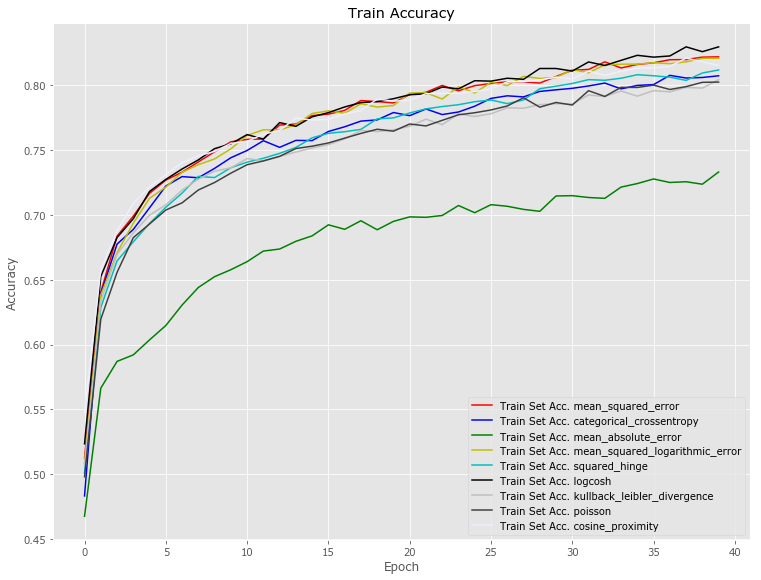

In [341]:
plt.plot(lista2[2], 'r-', label='Train Set Acc. mean_squared_error')
plt.plot(lista2[6], 'b-', label='Train Set Acc. categorical_crossentropy')
plt.plot(lista2[10], 'g-', label='Train Set Acc. mean_absolute_error')
plt.plot(lista2[14], 'y-', label='Train Set Acc. mean_squared_logarithmic_error')
plt.plot(lista2[18], 'c-', label='Train Set Acc. squared_hinge')
plt.plot(lista2[22], 'k-', label='Train Set Acc. logcosh')
plt.plot(lista2[26], '0.75', label='Train Set Acc. kullback_leibler_divergence')
plt.plot(lista2[30], '0.25', label='Train Set Acc. poisson')
plt.plot(lista2[34], '#eeefff', label='Train Set Acc. cosine_proximity')

plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
fig = plt.gcf()
fig.set_size_inches(12.5, 9.5)


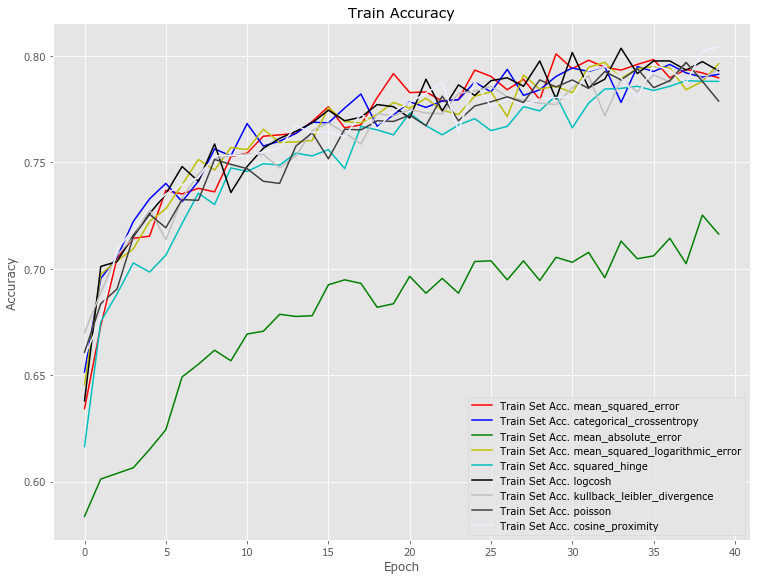

In [342]:
plt.plot(lista2[3], 'r-', label='Train Set Acc. mean_squared_error')
plt.plot(lista2[7], 'b-', label='Train Set Acc. categorical_crossentropy')
plt.plot(lista2[11], 'g-', label='Train Set Acc. mean_absolute_error')
plt.plot(lista2[15], 'y-', label='Train Set Acc. mean_squared_logarithmic_error')
plt.plot(lista2[19], 'c-', label='Train Set Acc. squared_hinge')
plt.plot(lista2[23], 'k-', label='Train Set Acc. logcosh')
plt.plot(lista2[27], '0.75', label='Train Set Acc. kullback_leibler_divergence')
plt.plot(lista2[31], '0.25', label='Train Set Acc. poisson')
plt.plot(lista2[35], '#eeefff', label='Train Set Acc. cosine_proximity')

plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
fig = plt.gcf()
fig.set_size_inches(12.5, 9.5)


Text(0.5,1,'Maximum Train Accuracy for each Loss Function')

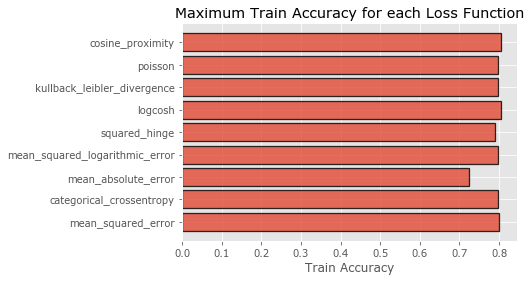

In [339]:
plt.style.use('ggplot')

losses=['mean_squared_error','categorical_crossentropy','mean_absolute_error','mean_squared_logarithmic_error',
       'squared_hinge','logcosh','kullback_leibler_divergence','poisson','cosine_proximity']

y_pos = np.arange(len(losses))
accs_test = [max(lista2[(4*i+3)]) for i in range(9)]

plt.barh(y_pos, accs_test, align='center', alpha=0.8, edgecolor='k', linewidth=1.3)
plt.yticks(y_pos, losses)
plt.xlabel('Train Accuracy')
plt.title('Maximum Train Accuracy for each Loss Function')

Text(0.5,1,'Maximum Validation Accuracy for each Loss Function')

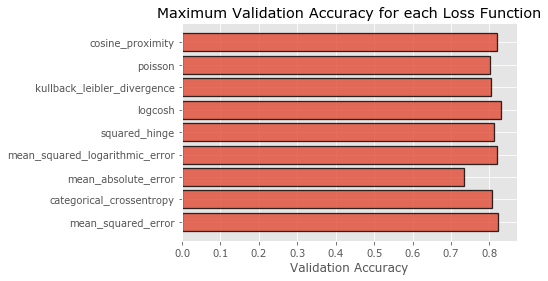

In [340]:
losses=['mean_squared_error','categorical_crossentropy','mean_absolute_error','mean_squared_logarithmic_error',
       'squared_hinge','logcosh','kullback_leibler_divergence','poisson','cosine_proximity']

y_pos = np.arange(len(losses))
accs_test = [max(lista2[(4*i+2)]) for i in range(9)]

plt.barh(y_pos, accs_test, align='center', alpha=0.8, edgecolor='k', linewidth=1.3)
plt.yticks(y_pos, losses)
plt.xlabel('Validation Accuracy')
plt.title('Maximum Validation Accuracy for each Loss Function')

## Activation Functions

From now on, we'll use logcosh loss function and Adam optimiser. The next step is to change the activation functions.

In [349]:
act_funcs = ['relu','elu','selu','tanh']
lista3 = []

for func in act_funcs:
    
    model = Sequential()
    model.add(Dense(40, activation=func, input_dim=54))
    model.add(Dense(30, activation=func))
    model.add(Dense(30, activation=func))
    model.add(Dropout(0.15))
    model.add(Dense(15, activation=func))
    model.add(Dropout(0.25))
    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='logcosh',
                  metrics=['accuracy'])

    history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=40, batch_size=10)
    
    lista3.append(history.history['loss'])
    lista3.append(history.history['val_loss'])
    lista3.append(history.history['acc'])
    lista3.append(history.history['val_acc'])

Train on 12096 samples, validate on 3024 samples
Epoch 1/40
12096/12096 [==============================] - 8s 691us/step - loss: 0.0408 - acc: 0.5002 - val_loss: 0.0313 - val_acc: 0.6481
Epoch 2/40
12096/12096 [==============================] - 4s 338us/step - loss: 0.0327 - acc: 0.6300 - val_loss: 0.0285 - val_acc: 0.6921
Epoch 3/40
12096/12096 [==============================] - 4s 360us/step - loss: 0.0302 - acc: 0.6607 - val_loss: 0.0271 - val_acc: 0.7034
Epoch 4/40
12096/12096 [==============================] - 5s 380us/step - loss: 0.0282 - acc: 0.6937 - val_loss: 0.0264 - val_acc: 0.7070
Epoch 5/40
12096/12096 [==============================] - 5s 383us/step - loss: 0.0269 - acc: 0.7040 - val_loss: 0.0259 - val_acc: 0.7173
Epoch 6/40
12096/12096 [==============================] - 4s 363us/step - loss: 0.0265 - acc: 0.7154 - val_loss: 0.0251 - val_acc: 0.7255
Epoch 7/40
12096/12096 [==============================] - 5s 406us/step - loss: 0.0256 - acc: 0.7254 - val_loss: 0.0249 - v

12096/12096 [==============================] - 5s 390us/step - loss: 0.0215 - acc: 0.7770 - val_loss: 0.0220 - val_acc: 0.7725
Epoch 20/40
12096/12096 [==============================] - 4s 361us/step - loss: 0.0214 - acc: 0.7755 - val_loss: 0.0222 - val_acc: 0.7682
Epoch 21/40
12096/12096 [==============================] - 4s 356us/step - loss: 0.0212 - acc: 0.7768 - val_loss: 0.0211 - val_acc: 0.7827
Epoch 22/40
12096/12096 [==============================] - 4s 362us/step - loss: 0.0208 - acc: 0.7867 - val_loss: 0.0213 - val_acc: 0.7844
Epoch 23/40
12096/12096 [==============================] - 4s 361us/step - loss: 0.0207 - acc: 0.7873 - val_loss: 0.0217 - val_acc: 0.7774
Epoch 24/40
12096/12096 [==============================] - 4s 364us/step - loss: 0.0205 - acc: 0.7868 - val_loss: 0.0209 - val_acc: 0.7860
Epoch 25/40
12096/12096 [==============================] - 4s 356us/step - loss: 0.0201 - acc: 0.7902 - val_loss: 0.0211 - val_acc: 0.7817
Epoch 26/40
12096/12096 [==============

12096/12096 [==============================] - 5s 421us/step - loss: 0.0199 - acc: 0.7965 - val_loss: 0.0208 - val_acc: 0.7877
Epoch 38/40
12096/12096 [==============================] - 5s 410us/step - loss: 0.0196 - acc: 0.7994 - val_loss: 0.0199 - val_acc: 0.7887
Epoch 39/40
12096/12096 [==============================] - 5s 405us/step - loss: 0.0197 - acc: 0.7962 - val_loss: 0.0200 - val_acc: 0.7950
Epoch 40/40
12096/12096 [==============================] - 5s 412us/step - loss: 0.0193 - acc: 0.8035 - val_loss: 0.0210 - val_acc: 0.7778
Train on 12096 samples, validate on 3024 samples
Epoch 1/40
12096/12096 [==============================] - 9s 766us/step - loss: 0.0356 - acc: 0.5961 - val_loss: 0.0297 - val_acc: 0.6799
Epoch 2/40
12096/12096 [==============================] - 5s 395us/step - loss: 0.0298 - acc: 0.6728 - val_loss: 0.0282 - val_acc: 0.6892
Epoch 3/40
12096/12096 [==============================] - 5s 390us/step - loss: 0.0280 - acc: 0.6982 - val_loss: 0.0267 - val_acc: 

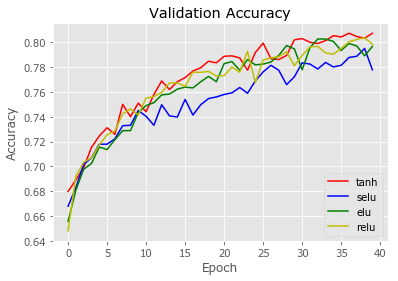

In [350]:
plt.plot(lista3[15], 'r-', label='tanh')
plt.plot(lista3[11], 'b-', label='selu')
plt.plot(lista3[7], 'g-', label='elu')
plt.plot(lista3[3], 'y-', label='relu')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Apparently, tanh activation function outperformed the other ones, resulting in a 0.807 validation accuracy value. Let's try more batches.

In [352]:
model = Sequential()
model.add(Dense(40, activation='tanh', input_dim=54))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dropout(0.15))
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='logcosh',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=80, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/80
12096/12096 [==============================] - 8s 658us/step - loss: 0.0365 - acc: 0.5873 - val_loss: 0.0298 - val_acc: 0.6677
Epoch 2/80
12096/12096 [==============================] - 4s 360us/step - loss: 0.0302 - acc: 0.6682 - val_loss: 0.0280 - val_acc: 0.6948
Epoch 3/80
12096/12096 [==============================] - 5s 376us/step - loss: 0.0281 - acc: 0.6967 - val_loss: 0.0267 - val_acc: 0.7116
Epoch 4/80
12096/12096 [==============================] - 4s 349us/step - loss: 0.0268 - acc: 0.7116 - val_loss: 0.0256 - val_acc: 0.7199
Epoch 5/80
12096/12096 [==============================] - 4s 346us/step - loss: 0.0262 - acc: 0.7217 - val_loss: 0.0254 - val_acc: 0.7229
Epoch 6/80
12096/12096 [==============================] - 4s 348us/step - loss: 0.0258 - acc: 0.7230 - val_loss: 0.0249 - val_acc: 0.7325
Epoch 7/80
12096/12096 [==============================] - 4s 352us/step - loss: 0.0251 - acc: 0.7310 - val_loss: 0.0244 - v

12096/12096 [==============================] - 4s 342us/step - loss: 0.0139 - acc: 0.8681 - val_loss: 0.0180 - val_acc: 0.8277
Epoch 60/80
12096/12096 [==============================] - 5s 375us/step - loss: 0.0136 - acc: 0.8702 - val_loss: 0.0180 - val_acc: 0.8277
Epoch 61/80
12096/12096 [==============================] - 4s 348us/step - loss: 0.0139 - acc: 0.8686 - val_loss: 0.0182 - val_acc: 0.8261
Epoch 62/80
12096/12096 [==============================] - 4s 344us/step - loss: 0.0133 - acc: 0.8747 - val_loss: 0.0184 - val_acc: 0.8271
Epoch 63/80
12096/12096 [==============================] - 5s 374us/step - loss: 0.0135 - acc: 0.8740 - val_loss: 0.0191 - val_acc: 0.8161
Epoch 64/80
12096/12096 [==============================] - 5s 378us/step - loss: 0.0133 - acc: 0.8737 - val_loss: 0.0187 - val_acc: 0.8208
Epoch 65/80
12096/12096 [==============================] - 5s 380us/step - loss: 0.0136 - acc: 0.8733 - val_loss: 0.0182 - val_acc: 0.8280
Epoch 66/80
12096/12096 [==============

The accuracy got a looot better!! But, a tendency to overfit showed up, let's add a little bit more of dropout.

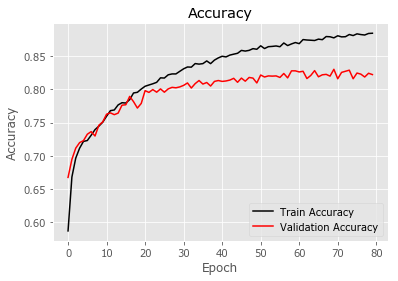

In [353]:
plt.plot(history.history['acc'], 'k-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r-', label='Validation Accuracy')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [355]:
model = Sequential()
model.add(Dense(40, activation='tanh', input_dim=54))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='logcosh',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=80, batch_size=10)

Train on 12096 samples, validate on 3024 samples
Epoch 1/80
12096/12096 [==============================] - 8s 652us/step - loss: 0.0389 - acc: 0.5462 - val_loss: 0.0307 - val_acc: 0.6581
Epoch 2/80
12096/12096 [==============================] - 4s 343us/step - loss: 0.0320 - acc: 0.6481 - val_loss: 0.0285 - val_acc: 0.6878
Epoch 3/80
12096/12096 [==============================] - 4s 339us/step - loss: 0.0304 - acc: 0.6677 - val_loss: 0.0274 - val_acc: 0.6961
Epoch 4/80
12096/12096 [==============================] - 4s 341us/step - loss: 0.0287 - acc: 0.6919 - val_loss: 0.0267 - val_acc: 0.7103
Epoch 5/80
12096/12096 [==============================] - 4s 363us/step - loss: 0.0277 - acc: 0.7044 - val_loss: 0.0261 - val_acc: 0.7166
Epoch 6/80
12096/12096 [==============================] - 4s 349us/step - loss: 0.0272 - acc: 0.7086 - val_loss: 0.0258 - val_acc: 0.7232
Epoch 7/80
12096/12096 [==============================] - 4s 363us/step - loss: 0.0267 - acc: 0.7168 - val_loss: 0.0255 - v

12096/12096 [==============================] - 5s 380us/step - loss: 0.0160 - acc: 0.8457 - val_loss: 0.0198 - val_acc: 0.8056
Epoch 60/80
12096/12096 [==============================] - 5s 391us/step - loss: 0.0159 - acc: 0.8495 - val_loss: 0.0191 - val_acc: 0.8191
Epoch 61/80
12096/12096 [==============================] - 5s 403us/step - loss: 0.0158 - acc: 0.8511 - val_loss: 0.0193 - val_acc: 0.8155
Epoch 62/80
12096/12096 [==============================] - 5s 385us/step - loss: 0.0160 - acc: 0.8495 - val_loss: 0.0186 - val_acc: 0.8224
Epoch 63/80
12096/12096 [==============================] - 5s 400us/step - loss: 0.0158 - acc: 0.8503 - val_loss: 0.0186 - val_acc: 0.8204
Epoch 64/80
12096/12096 [==============================] - 5s 384us/step - loss: 0.0156 - acc: 0.8549 - val_loss: 0.0190 - val_acc: 0.8194
Epoch 65/80
12096/12096 [==============================] - 5s 384us/step - loss: 0.0155 - acc: 0.8547 - val_loss: 0.0190 - val_acc: 0.8165
Epoch 66/80
12096/12096 [==============

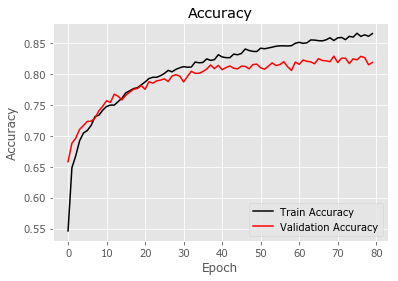

In [356]:
plt.plot(history.history['acc'], 'k-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r-', label='Validation Accuracy')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [357]:
print('The maximum validation accuracy was {}'.format(max(history.history['val_acc'])))

The maximum validation accuracy was 0.8287037016932296


## How about increasing the batch size?

In [358]:
model = Sequential()
model.add(Dense(40, activation='tanh', input_dim=54))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='logcosh',
              metrics=['accuracy'])

history = model.fit(X_std,y_1hot, validation_split=0.2, epochs=80, batch_size=25)

Train on 12096 samples, validate on 3024 samples
Epoch 1/80
12096/12096 [==============================] - 6s 467us/step - loss: 0.0417 - acc: 0.5016 - val_loss: 0.0324 - val_acc: 0.6372
Epoch 2/80
12096/12096 [==============================] - 2s 153us/step - loss: 0.0336 - acc: 0.6288 - val_loss: 0.0295 - val_acc: 0.6753
Epoch 3/80
12096/12096 [==============================] - 2s 148us/step - loss: 0.0313 - acc: 0.6629 - val_loss: 0.0281 - val_acc: 0.6948
Epoch 4/80
12096/12096 [==============================] - 2s 151us/step - loss: 0.0297 - acc: 0.6800 - val_loss: 0.0272 - val_acc: 0.7090
Epoch 5/80
12096/12096 [==============================] - 2s 148us/step - loss: 0.0291 - acc: 0.6914 - val_loss: 0.0270 - val_acc: 0.7063
Epoch 6/80
12096/12096 [==============================] - 2s 148us/step - loss: 0.0282 - acc: 0.7037 - val_loss: 0.0264 - val_acc: 0.7140
Epoch 7/80
12096/12096 [==============================] - 2s 158us/step - loss: 0.0276 - acc: 0.7068 - val_loss: 0.0262 - v

12096/12096 [==============================] - 2s 167us/step - loss: 0.0179 - acc: 0.8283 - val_loss: 0.0204 - val_acc: 0.7999
Epoch 60/80
12096/12096 [==============================] - 2s 159us/step - loss: 0.0177 - acc: 0.8263 - val_loss: 0.0206 - val_acc: 0.7983
Epoch 61/80
12096/12096 [==============================] - 2s 161us/step - loss: 0.0175 - acc: 0.8318 - val_loss: 0.0200 - val_acc: 0.8049
Epoch 62/80
12096/12096 [==============================] - 2s 161us/step - loss: 0.0173 - acc: 0.8312 - val_loss: 0.0204 - val_acc: 0.7989
Epoch 63/80
12096/12096 [==============================] - 2s 161us/step - loss: 0.0170 - acc: 0.8346 - val_loss: 0.0203 - val_acc: 0.8013
Epoch 64/80
12096/12096 [==============================] - 2s 158us/step - loss: 0.0174 - acc: 0.8334 - val_loss: 0.0211 - val_acc: 0.7960
Epoch 65/80
12096/12096 [==============================] - 2s 162us/step - loss: 0.0171 - acc: 0.8356 - val_loss: 0.0200 - val_acc: 0.8072
Epoch 66/80
12096/12096 [==============

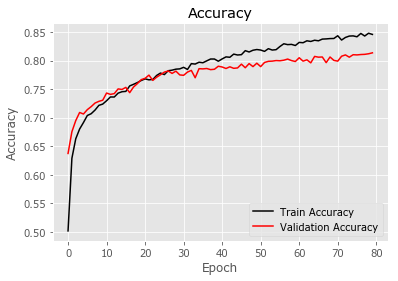

In [359]:
plt.plot(history.history['acc'], 'k-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r-', label='Validation Accuracy')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

As expected, the accuracy trained in the same quantity of epochs as before has decreased.